**SINE FUNCTION FITTING**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import statistics as st
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
def model(x):
    output = np.abs(2*np.pi*x)
    output = (output - np.min(output))/(np.max(output) - np.min(output))
    output = np.reshape(output, (len(x), 1))
    return output

def sigmoid(a, derivative = False):
    if derivative == False:
        output = 1/(1 + np.exp(-a))
    else:
        s = sigmoid(a)
        output = s*(1 - s)
    return output

def tanh(a, derivative = False):
    if derivative == False:
        output = np.tanh(a)
    else:
        output = 1 + (np.tanh(a))**2
    return output

def linear(x, derivative = False):
    if derivative == False:
        output = x
    else:
        output = 1
    return output

def rectified_linear(x, derivative = False):
    if derivative == False:
        output = np.maximum(0,x)
    else:
        output = np.maximum(0,1)
    return output

In [3]:
def x_vectors(x, n):
    vectors = []
    for i in range(n):
        vectors.append(x**i)
    vecs = np.dstack(np.split(np.array(vectors), n))
    vecs = np.reshape(vecs, (vecs.shape[1], vecs.shape[2]))
    return vecs


def initialize_weights_biases(input_size, hidden_size, output_size, factor = 0.01):
    omega0 = np.random.randn(hidden_size,input_size)*factor
    omega1 = np.random.randn(output_size, hidden_size)*factor
    bias0 = np.ones(hidden_size)
    bias1 = np.ones(output_size)

    weights_biases = {'omega0': omega0, 'omega1': omega1,'bias0': bias0,'bias1': bias1,}
    return weights_biases

def compute_RMSE():
    pass

In [4]:
def start_learning(x, validation, weights_biases, learning_rate, afunc_hidden, afunc_out, error_threshold, error_tracker = False):
    omega_h = weights_biases['omega0'].copy()
    omega_o = weights_biases['omega1'].copy()
    bias0 = weights_biases['bias0'].copy()
    bias1 = weights_biases['bias1'].copy()
    RMSE = []
    max_epoch = 50000
    epoch_counter = 1

    while True:
        # Getting outputs of the hidden layer
        aji = np.dot(x, omega_h.T)
        hidden_layer = afunc_hidden(aji + bias0)

        # Getting output
        ak = np.dot(hidden_layer, omega_o.T)
        output_layer = afunc_out(ak + bias1)

        # RMSE
        error = output_layer - validation
        current_RMSE = np.sqrt(np.mean(error**2))
        RMSE.append(current_RMSE)

        # For debugging
        if error_tracker == True:
            if epoch_counter%100 == 0:
                print('RMSE at epoch', epoch_counter, ': ', current_RMSE)

        # Breaks if RMSE is lesser than the threshol or if the maximum number of epochs have been reached
        if current_RMSE < error_threshold:
            break
        elif epoch_counter >= max_epoch:
            break
        # Solving for the error of the output
        delta_output = afunc_out((ak + bias1), derivative = True)*error

        # Solving for the error of the hidden units
        delta_hidden = afunc_hidden(aji + bias0, derivative = True)*np.dot(delta_output, omega_o)

        # Solving for the error derivatives
        E_hidden_derivative = np.dot(x.T, delta_hidden).T
        E_output_derivative = np.dot(hidden_layer.T,delta_output).T

        # updating weights
        omega_h += -learning_rate*E_hidden_derivative
        omega_o += -learning_rate*E_output_derivative

        epoch_counter +=1

    return output_layer, np.array(RMSE), omega_h, omega_o

In [5]:
def create_plots(x, predictions, validation,  RMSE, input_size, hidden_size, afunc_h, afunc_o, learning_rate, error_threshold):
    epochs = np.arange(1, len(RMSE)+1, 1)
    fig, ax = plt.subplots(1,2, figsize = (15,6))
    ax[0].scatter(x, validation, label = 'validation data', color = 'blue')
    ax[0].plot(x, predictions,label = 'neural network prediction', linestyle = '--', lw = 2, color = 'green', )
    ax[0].set_xlabel('$x$')
    ax[0].set_ylabel('$y$')
    ax[0].set_title('Data points: ' + str(len(x)) +
                    '; Input nodes: ' + str(input_size) +
                    '; Hidden nodes: ' + str(hidden_size) +
                    '\nHidden Activation function: ' + str(afunc_h.__name__) +
                    '\nOutput Activation function: ' + str(afunc_o.__name__) +
                    '\nLearning Rate: ' + str(learning_rate),
                    loc = 'left')
    ax[0].legend()

    ax[1].plot(epochs, RMSE, linestyle = '--', marker = ',', color = 'green')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('RMSE')

    if RMSE[len(RMSE)-1] >= error_threshold:
        ax[1].set_title('RMSE vs Epochs' +
                    '\nError threshold: ' + str(error_threshold) +
                    '\nTotal epochs: ' + str(len(RMSE))+
                    '\nFinal Error: ' + str(RMSE[len(RMSE)-1])+
                    '\nRemark: Took to long so program stopped.',
                    loc = 'left'
        )
    else:
        ax[1].set_title('RMSE vs Epochs' +
                    '\nError threshold: ' + str(error_threshold) +
                    '\nTotal epochs: ' + str(len(RMSE)),
                    loc = 'left'
        )

    plt.tight_layout()
    plt.show()

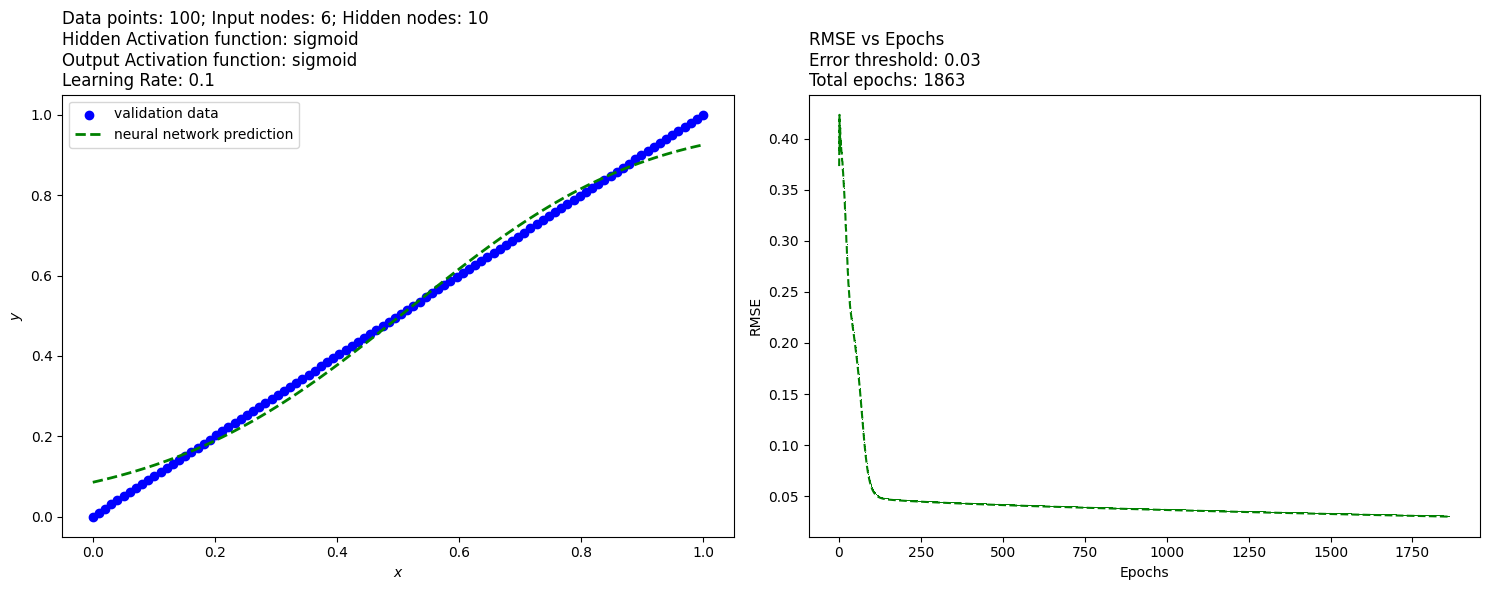

In [6]:
input_size = 6
hidden_size = 10
learning_rate = 0.1
x = np.linspace(0, 1, 100)
x_vec = x_vectors(x, input_size)
error_threshold = 0.03
weights_biases = initialize_weights_biases(input_size, hidden_size, 1)
activation_function1= sigmoid
activation_function2= sigmoid
validation = model(x)

z, RMSE, omega_h, omega_o = start_learning(x_vec, validation, weights_biases, learning_rate, activation_function1, activation_function2, error_threshold)
create_plots(x, z, validation,  RMSE, input_size, hidden_size, activation_function1, activation_function2, learning_rate, error_threshold)